In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')

In [2]:
events = pd.read_csv('data/events.csv')
matches = pd.read_csv('data/ginf.csv')

In [3]:
events.info()
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941009 entries, 0 to 941008
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id_odsp        941009 non-null  object 
 1   id_event       941009 non-null  object 
 2   sort_order     941009 non-null  int64  
 3   time           941009 non-null  int64  
 4   text           941009 non-null  object 
 5   event_type     941009 non-null  int64  
 6   event_type2    214293 non-null  float64
 7   side           941009 non-null  int64  
 8   event_team     941009 non-null  object 
 9   opponent       941009 non-null  object 
 10  player         880009 non-null  object 
 11  player2        291310 non-null  object 
 12  player_in      51715 non-null   object 
 13  player_out     51738 non-null   object 
 14  shot_place     227459 non-null  float64
 15  shot_outcome   228498 non-null  float64
 16  is_goal        941009 non-null  int64  
 17  location       467067 non-nul

In [4]:
events = events.merge(matches, on='id_odsp')

In [5]:
events['league'].replace({'D1': 'Bundesliga', 'SP1': 'La Liga', 'I1': 'Serie A', 'F1': 'Ligue 1', 'E0': 'Premier League'}, inplace=True)
matches['league'].replace({'D1': 'Bundesliga', 'SP1': 'La Liga', 'I1': 'Serie A', 'F1': 'Ligue 1', 'E0': 'Premier League'}, inplace=True)

In [6]:
events["shot_place"].replace({1: "Bit Too High", 2: "Blocked", 3: "Bottom Left Corner", 4: "Bottom Right Corner", 5: "Centre of the Goal", 6: "High and Wide", 7: "Hits the Bar", 8: "Misses to the Left", 9: "Misses to the Right", 10: "Too High", 11: "Top Centre of the Goal", 12: "Top Left Corner", 13: "Top Right Corner"}, inplace=True)
events["bodypart"].replace({1: "Right Foot", 2: "Left Foot", 3: "Head"}, inplace=True)

In [7]:
attempts = events[(events["event_type"] == 1) & (events["shot_place"] != "Blocked")]

In [8]:
attempts.loc[(attempts["shot_place"] == "High and Wide") & (attempts["text"].str.contains("high and wide to the left")), "shot_place"] = "High and Wide to the Left"
attempts.loc[(attempts["shot_place"] == "High and Wide") & (attempts["text"].str.contains("high and wide to the right")), "shot_place"] = "High and Wide to the Right"
attempts.loc[(attempts["shot_place"] == "Hits the Bar") & (attempts["text"].str.contains("right post")), "shot_place"] = "Right Post"
attempts.loc[(attempts["shot_place"] == "Hits the Bar") & (attempts["text"].str.contains("left post")), "shot_place"] = "Left Post"

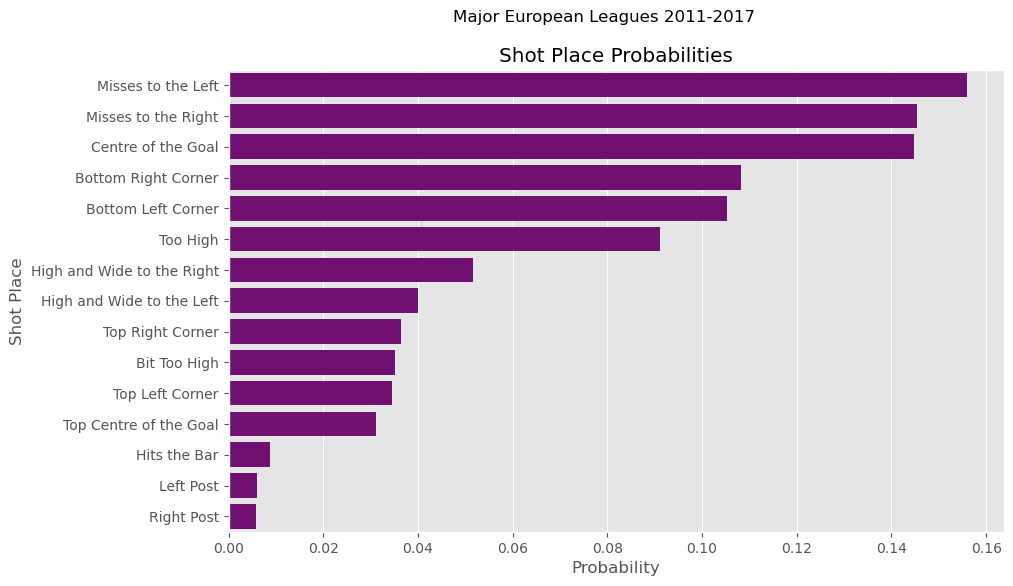

In [9]:
# plot shot place probabilities
shot_place = attempts.groupby(["shot_place"]).size().reset_index(name="count")
shot_place["prob"] = shot_place["count"] / shot_place["count"].sum()
shot_place = shot_place.sort_values(by="prob", ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(y="shot_place", x="prob", data=shot_place, color="purple")
plt.suptitle("Major European Leagues 2011-2017")
plt.title("Shot Place Probabilities")
plt.xlabel("Probability")
plt.ylabel("Shot Place")
plt.show()

Text(0, 0.5, 'Shot Place')

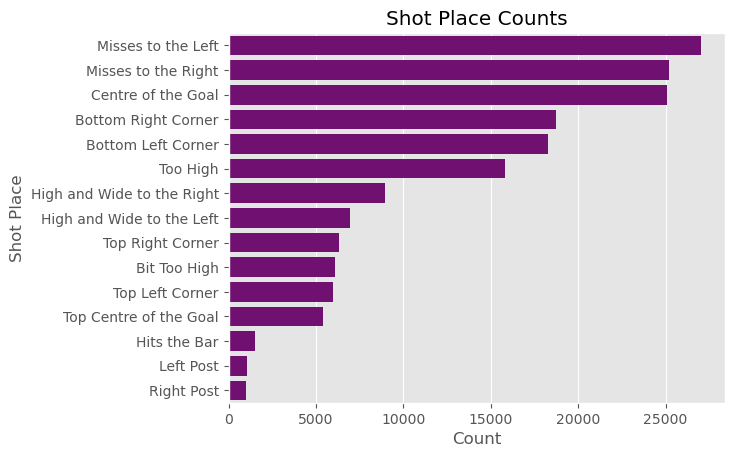

In [10]:
ax = sns.barplot(data=attempts["shot_place"].value_counts().reset_index(), y="index", x="shot_place", color="purple")
ax.set_title("Shot Place Counts")
ax.set_xlabel("Count")
ax.set_ylabel("Shot Place")

Text(0.5, 0.98, 'Major European Leagues 2011-2017')

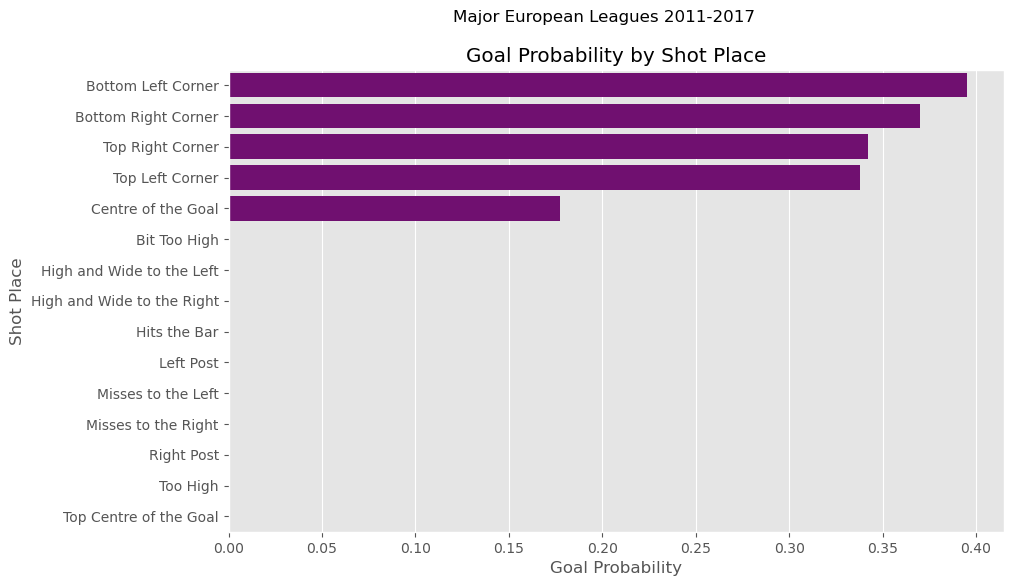

In [11]:
# goal probability by shot place
plt.figure(figsize=(10, 6))
sns.barplot(attempts.groupby("shot_place")["is_goal"].mean().sort_values(ascending=False).reset_index(), y="shot_place", x="is_goal", color="purple").set(xlabel="Goal Probability", ylabel="Shot Place", title="Goal Probability by Shot Place")
plt.suptitle("Major European Leagues 2011-2017")

In [12]:
on_target = attempts[attempts["shot_place"].isin(["Centre of the Goal", "Bottom Left Corner", "Bottom Right Corner", "Top Left Corner", "Top Right Corner"])]
off_target = attempts[~attempts["shot_place"].isin(["Centre of the Goal", "Bottom Left Corner", "Bottom Right Corner", "Top Left Corner", "Top Right Corner"])]

[Text(0.5, 0, 'Goal Probability'),
 Text(0, 0.5, 'Shot Place'),
 Text(0.5, 1.0, 'Goal Probability by Shot Place')]

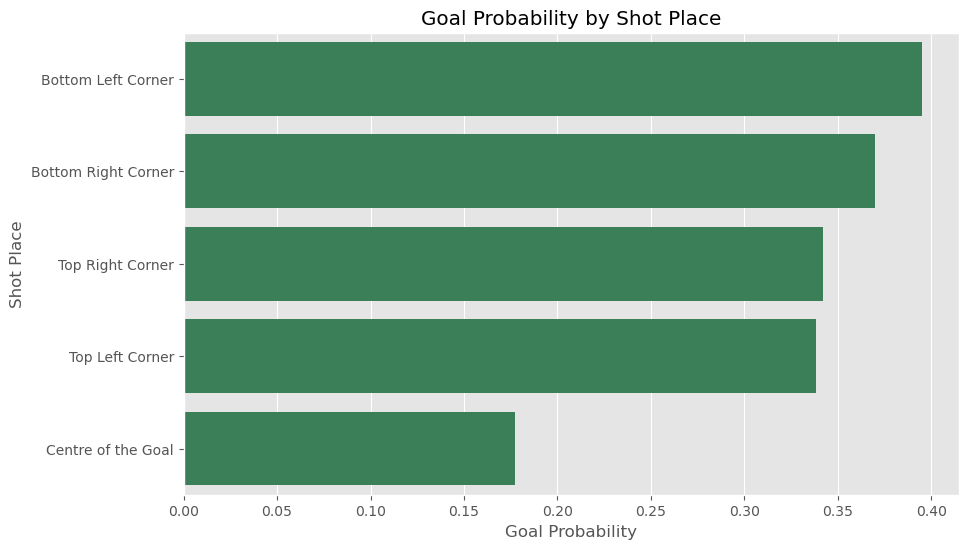

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(on_target.groupby("shot_place")["is_goal"].mean().sort_values(ascending=False).reset_index(), y="shot_place", x="is_goal", color="seagreen").set(xlabel="Goal Probability", ylabel="Shot Place", title="Goal Probability by Shot Place")

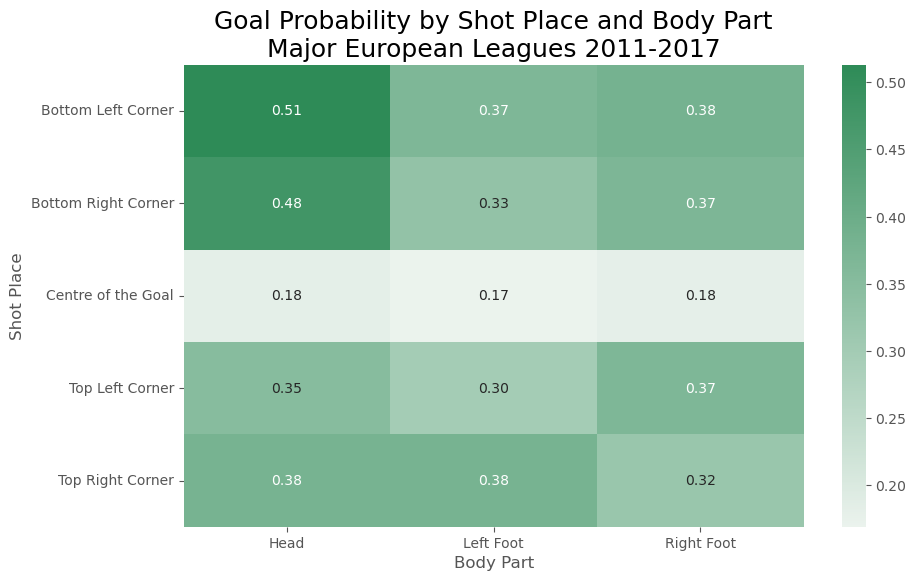

In [14]:
attempts[attempts["bodypart"] == "Head"]["is_goal"].mean()

attempts.groupby("bodypart")["is_goal"].mean()

plt.figure(figsize=(10, 6))
sns.heatmap(on_target.groupby(["shot_place", "bodypart"])["is_goal"].mean().unstack(), annot=True, fmt=".2f", cmap=sns.light_palette("seagreen", as_cmap=True)).set(xlabel="Body Part", ylabel="Shot Place")
plt.title("Goal Probability by Shot Place and Body Part\nMajor European Leagues 2011-2017", fontsize=18)
plt.savefig("./heatmap.png", transparent=True)

Text(0.5, 0.98, 'Major European Leagues 2011-2017')

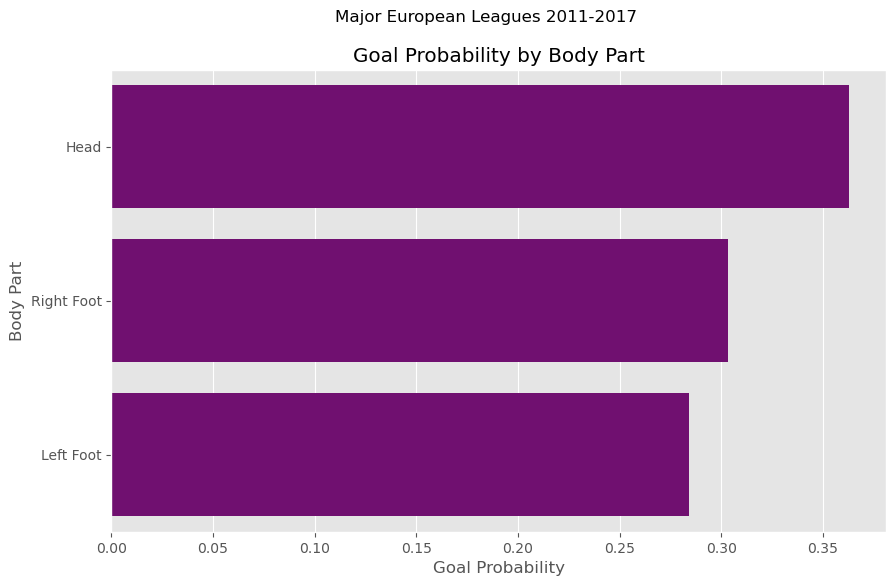

In [15]:
# goal proability by body part

plt.figure(figsize=(10, 6))
sns.barplot(on_target.groupby("bodypart")["is_goal"].mean().sort_values(ascending=False).reset_index(), y="bodypart", x="is_goal", color="purple").set(xlabel="Goal Probability", ylabel="Body Part", title="Goal Probability by Body Part")
plt.suptitle("Major European Leagues 2011-2017")

Text(0.5, 0.98, 'Major European Leagues 2011-2017')

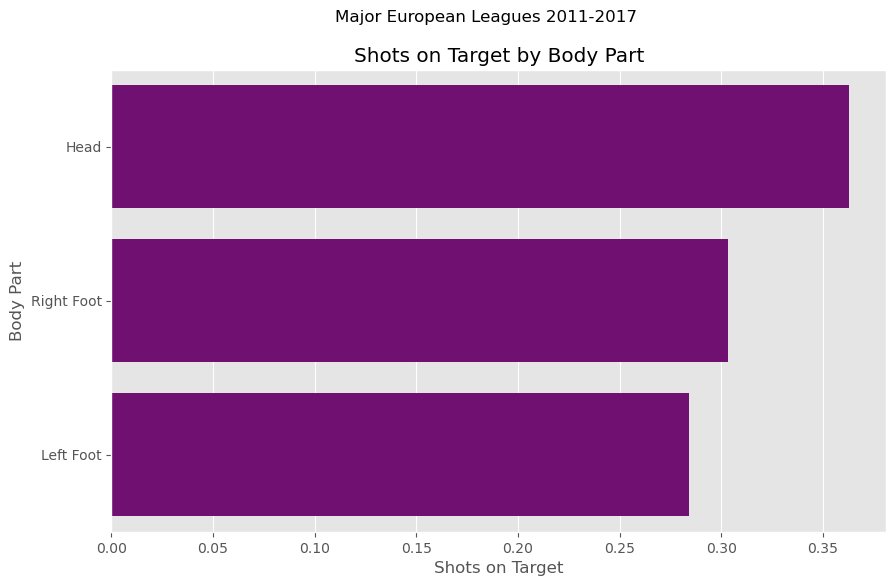

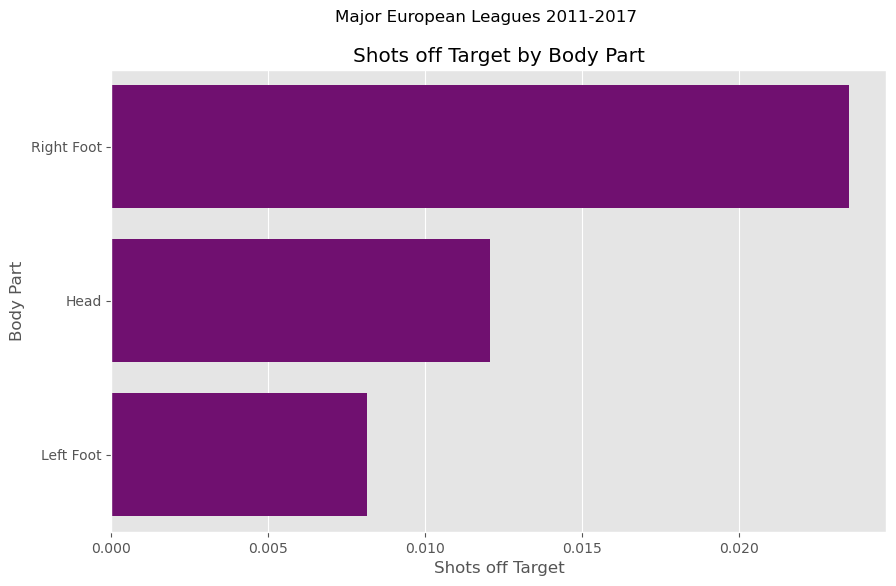

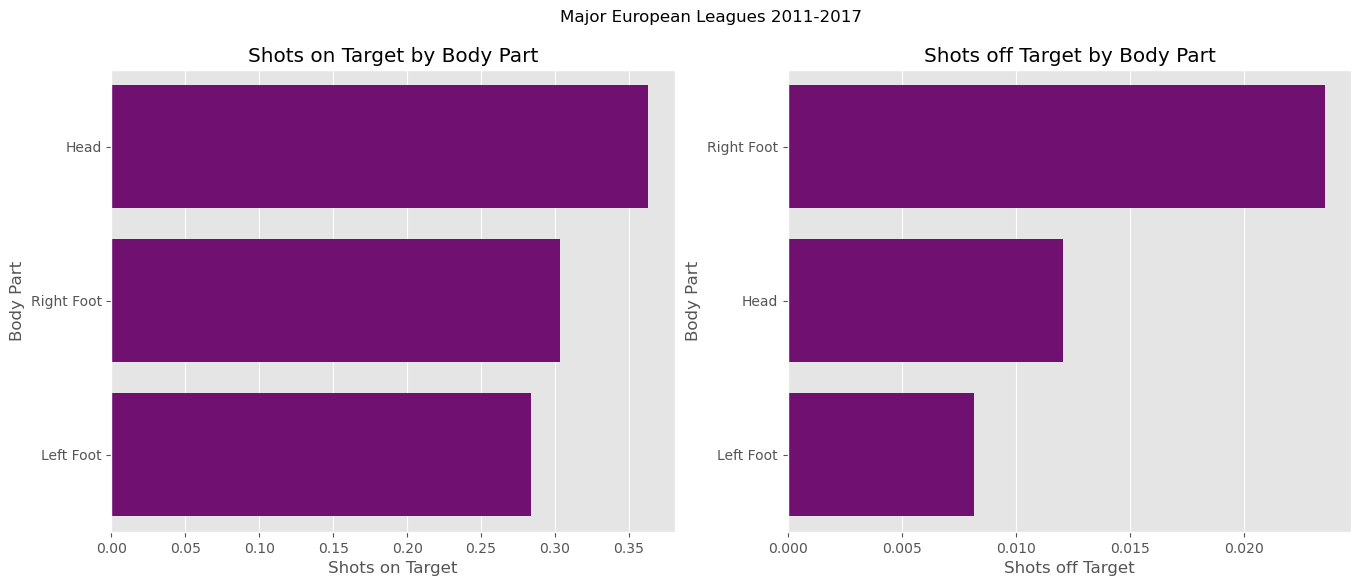

In [16]:
# shots on target by body part

plt.figure(figsize=(10, 6))
sns.barplot(on_target.groupby("bodypart")["is_goal"].mean().sort_values(ascending=False).reset_index(), y="bodypart", x="is_goal", color="purple").set(xlabel="Shots on Target", ylabel="Body Part", title="Shots on Target by Body Part")
plt.suptitle("Major European Leagues 2011-2017")

# shot off target by body part

plt.figure(figsize=(10, 6))
sns.barplot(off_target.groupby("bodypart")["is_goal"].mean().sort_values(ascending=False).reset_index(), y="bodypart", x="is_goal", color="purple").set(xlabel="Shots off Target", ylabel="Body Part", title="Shots off Target by Body Part")
plt.suptitle("Major European Leagues 2011-2017")

# on target and off target plots side by side

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.barplot(on_target.groupby("bodypart")["is_goal"].mean().sort_values(ascending=False).reset_index(), y="bodypart", x="is_goal", color="purple", ax=axes[0]).set(xlabel="Shots on Target", ylabel="Body Part", title="Shots on Target by Body Part")
sns.barplot(off_target.groupby("bodypart")["is_goal"].mean().sort_values(ascending=False).reset_index(), y="bodypart", x="is_goal", color="purple", ax=axes[1]).set(xlabel="Shots off Target", ylabel="Body Part", title="Shots off Target by Body Part")
plt.suptitle("Major European Leagues 2011-2017")




In [17]:
events = events[events["season"] > 2014]

In [18]:
def getRedCardsPerPlayer():
    red_cards = events[events["event_type"] == 6]
    red_cards = red_cards[["player","id_odsp"]].drop_duplicates()
    red_cards = red_cards.groupby("player").count().reset_index()
    red_cards.columns = ["player", "red_cards"]
    red_cards.sort_values("red_cards", ascending=False, inplace=True)
    return red_cards

In [19]:
def getRedCardsPerLeague():
    red_cards = events[(events["event_type"] == 6)]
    red_cards = red_cards[["league","id_odsp"]]
    red_cards = red_cards.groupby("league").count().reset_index()
    red_cards.columns = ["league", "red_cards"]
    red_cards.sort_values("red_cards", ascending=False, inplace=True)
    return red_cards

def getYellowCardsPerLeague():
    yellow_cards = events[(events["event_type"] == 4) | (events["event_type"] == 5)]
    yellow_cards = yellow_cards[["league","id_odsp"]]
    yellow_cards = yellow_cards.groupby("league").count().reset_index()
    yellow_cards.columns = ["league", "yellow_cards"]
    yellow_cards.sort_values("yellow_cards", ascending=False, inplace=True)
    return yellow_cards

In [20]:
def getFoulsPerLeague():
    fouls = events[events["event_type"] == 3]
    fouls = fouls[["league","sort_order"]]
    fouls = fouls.groupby("league").count().reset_index()
    fouls.columns = ["league", "fouls"]
    fouls.sort_values("fouls", ascending=False, inplace=True)
    return fouls

getFoulsPerLeague()

,league,fouls
4,Serie A,26343
2,Ligue 1,23640
1,La Liga,22685
0,Bundesliga,20424
3,Premier League,20392


/home/jeremi/miniconda3/envs/twd/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/home/jeremi/miniconda3/envs/twd/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/home/jeremi/miniconda3/envs/twd/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/home/jeremi/miniconda3/envs/twd/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/home/jeremi/miniconda3/envs/twd/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


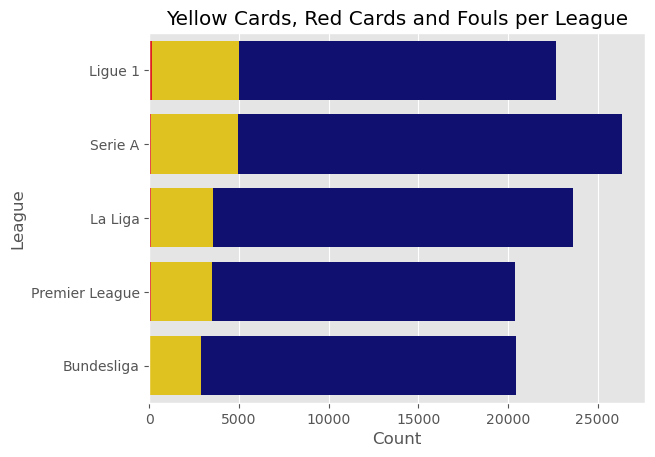

In [21]:
yellow_cards = getYellowCardsPerLeague()
red_cards = getRedCardsPerLeague()
fouls = getFoulsPerLeague()

#concatenate the three dataframes
fouls = pd.concat([yellow_cards, red_cards, fouls])

ax = plt.subplots()
ax = sns.barplot(data= fouls, x="fouls", y="league" , color="navy")
ax = sns.barplot(data= getYellowCardsPerLeague(), x="yellow_cards", y="league", color="gold")
ax = sns.barplot(data=getRedCardsPerLeague(), x="red_cards", y="league", color="red")
ax.set(xlabel="Count", ylabel="League", title="Yellow Cards, Red Cards and Fouls per League")
plt.show()

In [22]:
def plotGoalByAssistMethod():
    assists = events[events["assist_method"] != 0]
    assists = assists[["assist_method", "is_goal"]]
    assists = assists.groupby("assist_method").mean().reset_index()
    assists.columns = ["assist_method", "goal_probability"]
    assists["assist_method"].replace({1: "Pass", 2: "Cross", 3: "Headed Pass", 4: "Trough Ball"}, inplace=True)
    return assists
plotGoalByAssistMethod()

,assist_method,goal_probability
0,Pass,0.081956
1,Cross,0.115972
2,Headed Pass,0.110521
3,Trough Ball,0.276014


[Text(0.5, 1.0, 'Goal Probability by Assist Method and Location')]

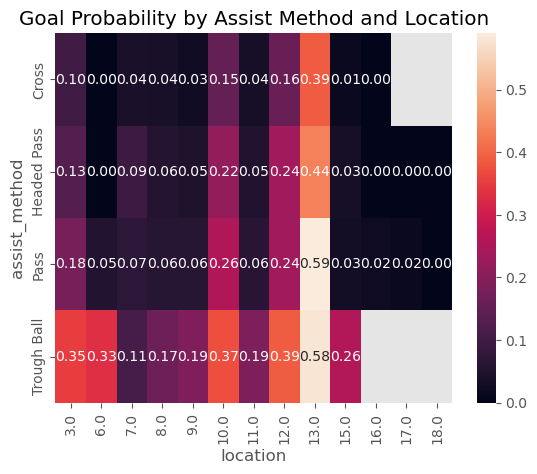

In [23]:
def goalByAssistMethodAndLocation():
    assists = events[events["assist_method"] != 0]
    assists = assists[["assist_method", "location", "is_goal"]]
    assists = assists.groupby(["assist_method", "location"]).mean().reset_index()
    assists.columns = ["assist_method", "location", "goal_probability"]
    assists["assist_method"].replace({1: "Pass", 2: "Cross", 3: "Headed Pass", 4: "Trough Ball"}, inplace=True)
    return assists
v = goalByAssistMethodAndLocation()

sns.heatmap(v.groupby(["assist_method", "location"])["goal_probability"].mean().unstack(), annot=True, fmt=".2f").set(title="Goal Probability by Assist Method and Location")

In [24]:
# compare top scorers across leagues

def getTopScorers():
    top_scorers = events[events["event_type"] == 1]
    top_scorers = top_scorers[["player", "is_goal"]]
    top_scorers = top_scorers.groupby("player").sum().reset_index()
    top_scorers.columns = ["player", "goals"]
    top_scorers.sort_values("goals", ascending=False, inplace=True)
    return top_scorers

getTopScorers()

,player,goals
667,cristiano ronaldo,89
1907,lionel messi,81
3353,zlatan ibrahimovic,69
1979,luis suarez,68
182,alexandre lacazette,65
...,...,...
1642,jordan lyden,0
1640,jordan leborgne,0
1639,jordan ikoko,0
1634,jordan adeoti,0


In [25]:
# match win probability by side

def getMatchWinProbability():
    match_win_probability = events[events["event_type"] == 1]
    match_win_probability = match_win_probability[["id_odsp", "side", "is_goal"]]
    match_win_probability = match_win_probability.groupby(["id_odsp", "side"]).sum().reset_index()
    match_win_probability.columns = ["id_odsp", "side", "goals"]
    match_win_probability = match_win_probability.merge(match_win_probability.groupby("id_odsp")["goals"].sum().reset_index(), on="id_odsp")
    match_win_probability.columns = ["id_odsp", "side", "goals", "total_goals"]
    match_win_probability["win_probability"] = match_win_probability["goals"] / match_win_probability["total_goals"]
    return match_win_probability

In [26]:
# draw rectangle



In [27]:
attempts.groupby("shot_place")["is_goal"].mean().sort_values(ascending=False).reset_index()

,shot_place,is_goal
0,Bottom Left Corner,0.394962
1,Bottom Right Corner,0.369746
2,Top Right Corner,0.342055
3,Top Left Corner,0.338125
4,Centre of the Goal,0.177280
5,Bit Too High,0.000000
6,High and Wide to the Left,0.000000
7,High and Wide to the Right,0.000000
8,Hits the Bar,0.000000
9,Left Post,0.000000


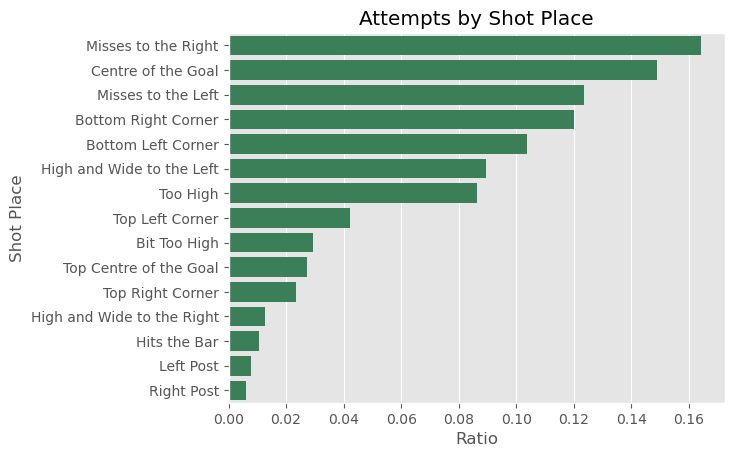

In [28]:
# attempts by shot place plot
attempt_left_foot = attempts[attempts["bodypart"] == "Left Foot"]
ratio_attempts = attempt_left_foot.groupby("shot_place")["is_goal"].agg(["mean", "count"]).sort_values("count", ascending=False).reset_index()
ratio_attempts["ratio"] = ratio_attempts["count"] / len(attempt_left_foot)

# sns greens barplot

ax = plt.subplots()
ax = sns.barplot(data=ratio_attempts, x="ratio", y="shot_place", color="seagreen")
ax.set(ylabel="Shot Place", xlabel="Ratio", title="Attempts by Shot Place")
plt.show()


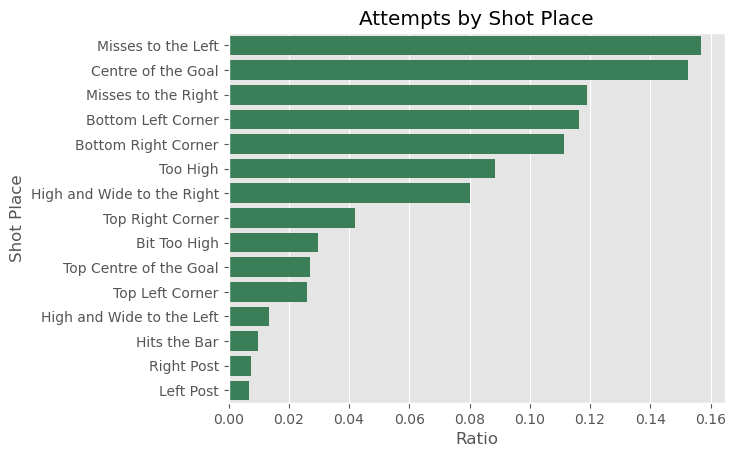

In [29]:
# attempts by shot place plot
attempt_left_foot = attempts[attempts["bodypart"] == "Right Foot"]
ratio_attempts = attempt_left_foot.groupby("shot_place")["is_goal"].agg(["mean", "count"]).sort_values("count", ascending=False).reset_index()
ratio_attempts["ratio"] = ratio_attempts["count"] / len(attempt_left_foot)

# sns greens barplot

ax = plt.subplots()
ax = sns.barplot(data=ratio_attempts, x="ratio", y="shot_place", color="seagreen")
ax.set(ylabel="Shot Place", xlabel="Ratio", title="Attempts by Shot Place")
plt.show()

In [30]:
start_x = 0
start_y = 0



In [31]:
# shots on taget vs off taget per league

def shotsOnTargetVsOffTargetPerLeague(league):
    league_attempts = attempts[attempts["league"] == league]
    len_league_attempts = len(league_attempts)
    league_attempts = league_attempts.groupby("is_goal")["is_goal"].agg(["mean", "count"]).sort_values("count", ascending=False).reset_index()
    league_attempts["ratio"] = league_attempts["count"] / len_league_attempts
    return league_attempts

In [32]:
for league in attempts["league"].unique():
    print(league)
    print(shotsOnTargetVsOffTargetPerLeague(league))

Bundesliga
   is_goal  mean  count     ratio
0        0   0.0  27402  0.855697
1        1   1.0   4621  0.144303
Ligue 1
   is_goal  mean  count     ratio
0        0   0.0  33160  0.864465
1        1   1.0   5199  0.135535
La Liga
   is_goal  mean  count     ratio
0        0   0.0  33201  0.856159
1        1   1.0   5578  0.143841
Serie A
   is_goal  mean  count     ratio
0        0   0.0  35850  0.867178
1        1   1.0   5491  0.132822
Premier League
   is_goal  mean  count     ratio
0        0   0.0  20999  0.855322
1        1   1.0   3552  0.144678


In [33]:
# left fot vs right foot shots on target

def leftFootVsRightFootShotsOnTarget():
    left_foot = attempts[(attempts["bodypart"] == "Left Foot")]
    right_foot = attempts[(attempts["bodypart"] == "Right Foot")]
    len_left_foot = len(left_foot)
    len_right_foot = len(right_foot)
    left_foot = left_foot.groupby("is_goal")["is_goal"].agg(["mean", "count"]).sort_values("count", ascending=False).reset_index()
    right_foot = right_foot.groupby("is_goal")["is_goal"].agg(["mean", "count"]).sort_values("count", ascending=False).reset_index()
    left_foot["ratio"] = left_foot["count"] / len_left_foot
    right_foot["ratio"] = right_foot["count"] / len_right_foot
    return left_foot, right_foot

left_foot, right_foot = leftFootVsRightFootShotsOnTarget()
print(left_foot)
print(right_foot)


   is_goal  mean  count     ratio
0        0   0.0  45596  0.870934
1        1   1.0   6757  0.129066
   is_goal  mean  count     ratio
0        0   0.0  76814  0.851011
1        1   1.0  13448  0.148989


[Text(0.5, 0, 'Goal Probability'),
 Text(0, 0.5, 'Shot Place'),
 Text(0.5, 1.0, 'Goal Probability by Shot Place')]

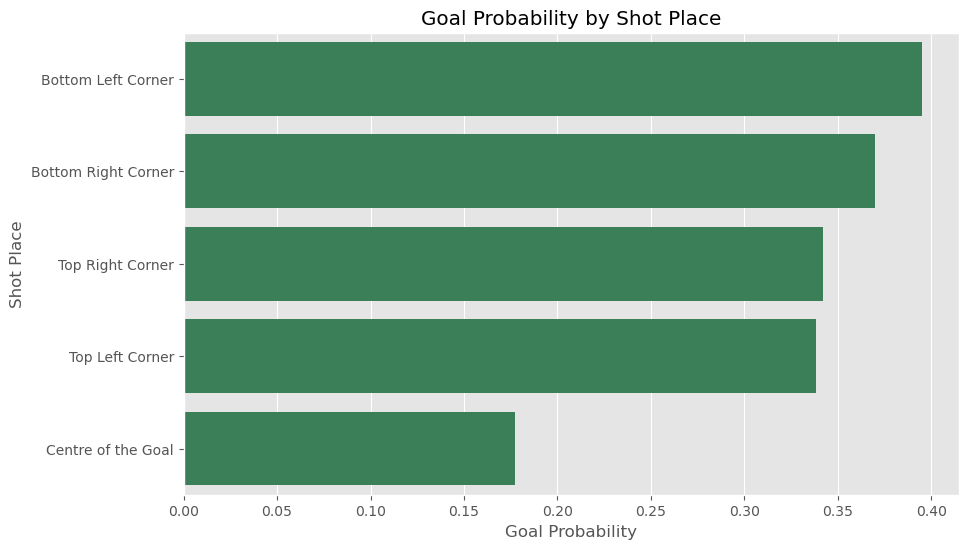

In [34]:
plt.figure(figsize=(10, 6))
sns.barplot(on_target.groupby("shot_place")["is_goal"].mean().sort_values(ascending=False).reset_index(), y="shot_place", x="is_goal", color="seagreen").set(xlabel="Goal Probability", ylabel="Shot Place", title="Goal Probability by Shot Place")

In [45]:
bottom_left_corner = (0, 0)
top_right_corner = (1,1)
bottom_right_corner = (1, 0)
top_left_corner = (0, 1)
center = (0.5, 0.5)



/home/jeremi/Studia/TWD/FootballEvents


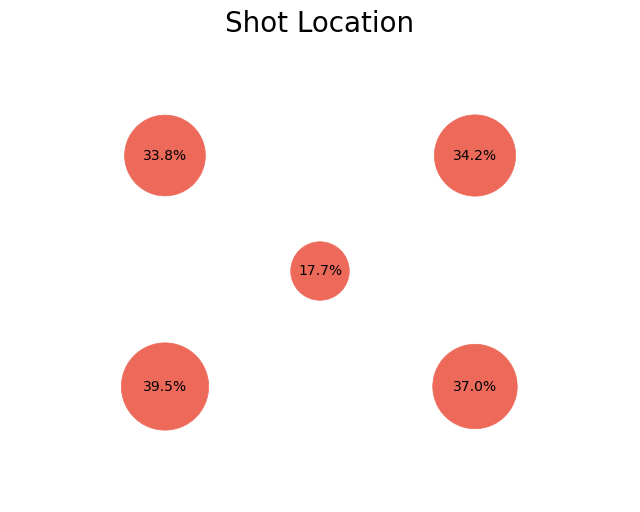

In [107]:
shot_location = on_target.groupby("shot_place")["is_goal"].mean()
shot_location = shot_location.sort_values(ascending=False).reset_index()
shot_location["x"] = [bottom_left_corner[0], bottom_right_corner[0], top_right_corner[0], top_left_corner[0], center[0]]
shot_location["y"] = [bottom_left_corner[1], bottom_right_corner[1], top_right_corner[1], top_left_corner[1], center[1]]
!pwd
# shot location bubble plot
plt.figure(figsize=(8, 6))
plt.scatter(shot_location["x"], shot_location["y"], s=shot_location["is_goal"] * 10000, color="#ED6A5A")
# plt.text(bottom_left_corner[0], bottom_left_corner[1], "Bottom Left Corner")
# plt.text(bottom_right_corner[0], bottom_right_corner[1], "Bottom Right Corner")
# plt.text(top_right_corner[0], top_right_corner[1], "Top Right Corner")
# plt.text(top_left_corner[0], top_left_corner[1], "Top Left Corner")
# plt.text(center[0], center[1], "Center")
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.title("Shot Location", size=20)

# hide axes
plt.gca().axes.get_xaxis().set_visible(False)
plt.gca().axes.get_yaxis().set_visible(False)

# add shot place percentage
for i in range(len(shot_location)):
    plt.text(shot_location["x"][i], shot_location["y"][i], str(round(shot_location["is_goal"][i] * 100, 1)) + "%", horizontalalignment="center", verticalalignment="center")
# remove frame
plt.box(False)

# remove white lines
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["left"].set_visible(False)
# save figure with transparent background
plt.savefig("shot_location.png", transparent=True)
plt.show()
